In [1]:
import os
os.getcwd()

'/gpfs/home/djs19ctu'

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
os.chdir('/gpfs/home/djs19ctu/ML_other')
os.getcwd()

'/gpfs/home/djs19ctu/ML_other'

In [4]:
contents = os.listdir(os.getcwd())

print("Contents of the current working directory:")
for item in contents:
    print(item)

Contents of the current working directory:
winequality-red.csv
.git


In [5]:

file_path = 'winequality-red.csv'
wine_data = pd.read_csv(file_path)
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
quality2 = []
for i in wine_data['quality']:
    if i >= 1 and i <= 5:
        quality2.append('bad')
    elif i >= 6 and i <= 10:
        quality2.append('good')
wine_data['good_bad'] = quality2
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_bad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,bad


In [11]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  good_bad              1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


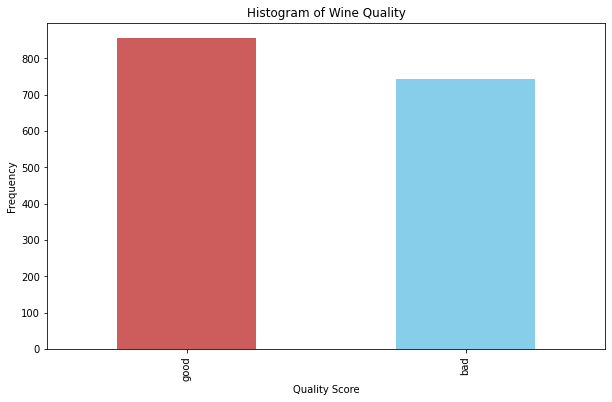

In [43]:

# Create a histogram for the 'good_bad' data
plt.figure(figsize=(10, 6))

# Plot the histogram
wine_data['good_bad'].value_counts().plot(kind='bar', color=['indianred', 'skyblue'], edgecolor='None')

# Add labels, title
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.title('Histogram of Wine Quality')

# Show the plot
plt.show()

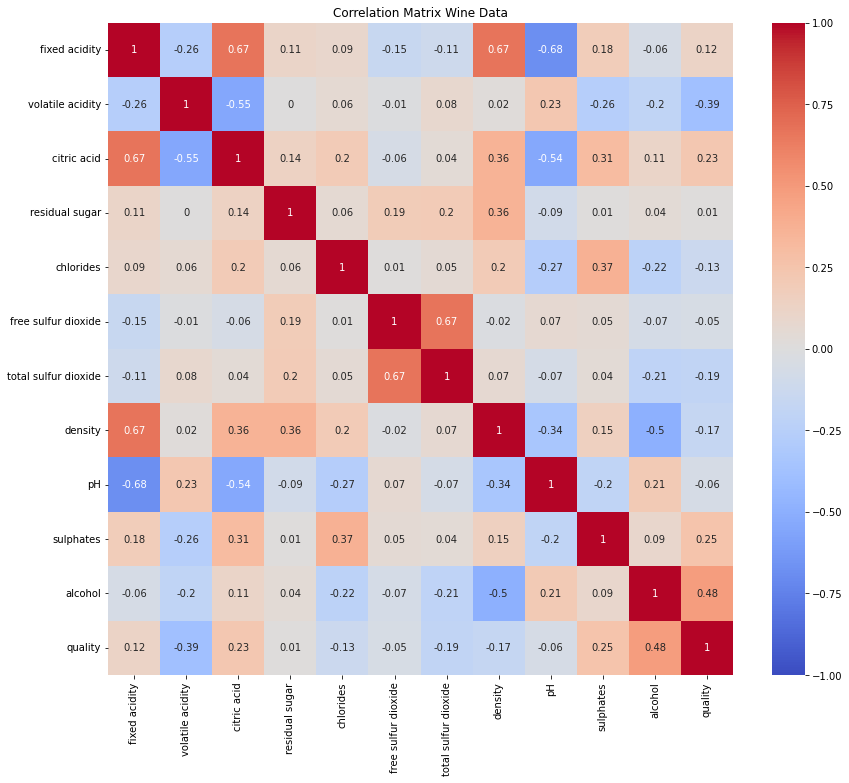

In [13]:

# Calculate the correlation matrix
corr_wine_data = round(wine_data.corr(), 2)

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_wine_data, vmin=-1, vmax=1, center=0, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Wine Data')
plt.show()

In [14]:
X = wine_data.drop(columns=['quality', 'good_bad'])
y = wine_data['good_bad']

In [17]:
### RANDOM FOREST CLASSIFIER ###

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Define features and target
features = wine_data.drop(columns=['quality', 'good_bad'])
target = wine_data['good_bad']

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Apply Min-Max scaling to features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_encoded, test_size=0.2, random_state=42)

# Initialize the RandomForest classifier with more hyperparameters
rf_classifier = RandomForestClassifier(
    n_estimators=1000,           # Number of trees in the forest
    max_depth=100,               # Maximum depth of the tree
    random_state=42,            # Seed used by the random number generator
)
# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = rf_classifier.predict(X_test)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)


Cross-validation scores: [0.80078125 0.80859375 0.79296875 0.8203125  0.8627451 ]
Mean cross-validation score: 0.8170802696078432
Confusion matrix:
 [[107  34]
 [ 34 145]]


In [18]:
### GRADIENT BOOSTING CLASSIFIER ###


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming wine_data is already loaded and contains the 'quality' and 'good_bad' columns

# Define features and target
features = wine_data.drop(columns=['quality', 'good_bad'])
target = wine_data['good_bad']

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Apply Min-Max scaling to features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_encoded, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier with hyperparameters
gb_classifier = GradientBoostingClassifier(
    n_estimators=1000,           # Number of boosting stages to be run
    max_depth=100,                # Maximum depth of the individual estimators
    learning_rate=0.01,          # Learning rate shrinks the contribution of each tree
    random_state=42              # Seed used by the random number generator
)

# Perform cross-validation
cv_scores = cross_val_score(gb_classifier, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = gb_classifier.predict(X_test)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)


Cross-validation scores: [0.72265625 0.75       0.6953125  0.75390625 0.78039216]
Mean cross-validation score: 0.740453431372549
Confusion matrix:
 [[103  38]
 [ 45 134]]


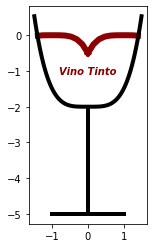

In [19]:
### Draw a wine glass ###

# Function to draw a wine glass
def draw_wine_glass():
    fig, ax = plt.subplots()

    # Define the coordinates for the base, stem, and bowl
    base_x = np.array([-1, 1])
    base_y = np.array([-5, -5])

    stem_x = np.array([0, 0])
    stem_y = np.array([-5, -2])

    bowl_side_left_x = np.linspace(-1.4, 0, 10)
    bowl_side_left_y = -0.5 * (bowl_side_left_x + 1)**4 + 1

    bowl_side_right_x = np.linspace(0, 1.4, 10)
    bowl_side_right_y = -0.5 * (bowl_side_right_x - 1)**4 + 1

    bowl_top_x = np.linspace(-1.5, 1.5, 100)
    bowl_top_y = -1 + 0.5 * bowl_top_x**4

    # Plot the base
    ax.plot(base_x, base_y, color='black', linewidth=4)

    # Plot the stem
    ax.plot(stem_x, stem_y, color='black', linewidth=4)

    # Plot the bowl
    ax.plot(bowl_side_left_x, bowl_side_left_y - 1, color='darkred', linewidth=6)
    ax.plot(bowl_side_right_x, bowl_side_right_y - 1, color='darkred', linewidth=6)
    ax.plot(bowl_top_x, bowl_top_y - 1, color='black', linewidth=4)

    # Add text to the middle of the glass
    ax.text(0, -1, 'Vino Tinto', fontsize=10, ha='center', va='center', color='darkred', fontweight='bold', style='italic')

    # Set the aspect of the plot to be equal
    ax.set_aspect('equal')

    # Remove the axes
    # ax.axis('off')

    # Show the plot
    plt.show()

# Call the function to draw the wine glass
draw_wine_glass()
